In [1]:
import subprocess
import os 
import re
import numpy as np
import pandas as pd
from collections import Counter

In [2]:
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

In [3]:
atp_pocks = pd.read_excel('atp_pockets.xlsx', columns= ['Pockets', 'Clusters'])
atp_pocks = atp_pocks.drop(['Unnamed: 0'], axis=1)
atp_pocks.columns = ['Kinase', 'atp']
atp_pocks = atp_pocks[atp_pocks["atp"]=="atp"]

In [4]:
print(np.array(atp_pocks[atp_pocks["Kinase"] == "1blx_1"])[0][1])

atp


In [5]:
atp_pocks.shape[0]

191

In [6]:
def find_unique_common(data1,data2,field):
    outliers = []
    # belong to data1 and doesn't belong to data2
    data1_unique = data1[~data1[field].isin(data2 [field])]
    print(color.BOLD + "Data 1 only: "+str(len(data1_unique)) + color.END)
    if len(data1_unique) < 6:
        print(data1_unique)
        outliers = outliers + data1_unique["Kinase"].tolist()
#     # belong to data2 and doesn't belong to data1
#     data2_unique = data2[~data2[field].isin(data1 [field])]
#     print(color.BOLD + "Data 2 only: "+str(len(data2_unique)) + color.END)
#     if len(data2_unique) != 0:
#         print(data2_unique)
#     # they have in common
    common = pd.merge(data1, data2, on=field)
    print(color.RED + "ATPs: "+str(len(common)) + color.END)
    print(color.YELLOW + "Non ATPs: "+str(data1.shape[0]-len(common)) + color.END)
    print(color.YELLOW + "Total: "+str(data1.shape[0]) + color.END)
    
    if len(common)<6:
        print(common)
#     total_prot = pd.concat([data1_unique,data2_unique,common])
#     print(len(total_prot))
    return outliers

In [7]:
def find_atps(num_clust,path1):
    outliers_total = []
    for i in range(num_clust):
        path = path1+"/Clusters_"+str(i)+".xlsx"
        cluster = pd.read_excel(path)
        print(color.UNDERLINE + "----------------------Cluster "+str(i)+"------------------------------------"+ color.END)
        outliers = find_unique_common(cluster,atp_pocks,"Kinase")
        outliers_total = outliers_total + outliers
    return outliers_total

In [10]:
find_atps(12,"Pockets30_Agglomerative/Cluster12/")

----------------------Cluster 0------------------------------------
Data 1 only: 15
ATPs: 4
Non ATPs: 15
Total: 19
   Kinase  Cluster  atp
0  1p4o_1        0  atp
1  1vzo_1        0  atp
2  4l42_1        0  atp
3  4z55_2        0  atp
----------------------Cluster 1------------------------------------
Data 1 only: 6
ATPs: 5
Non ATPs: 6
Total: 11
   Kinase  Cluster  atp
0  2xir_2        1  atp
1  3gp0_2        1  atp
2  3hng_2        1  atp
3  4yz9_1        1  atp
4  5hu9_2        1  atp
----------------------Cluster 2------------------------------------
Data 1 only: 42
ATPs: 175
Non ATPs: 42
Total: 217
----------------------Cluster 3------------------------------------
Data 1 only: 2
   Kinase  Cluster
2  3v5w_1        3
3  6bru_1        3
ATPs: 2
Non ATPs: 2
Total: 4
   Kinase  Cluster  atp
0  3s95_1        3  atp
1  3soc_2        3  atp
----------------------Cluster 4------------------------------------
Data 1 only: 1
   Kinase  Cluster
3  4asz_3        4
ATPs: 4
Non ATPs: 1
Total: 5

['3v5w_1',
 '6bru_1',
 '4asz_3',
 '4qpm_2',
 '4yfi_2',
 '5j5t_2',
 '6eim_2',
 '5xs2_2',
 '1xjd_2',
 '3v5w_3',
 '4tnd_1',
 '4yhj_3',
 '5k00_1',
 '2fst_1',
 '4qtb_2',
 '4zzn_2',
 '2y4i_2',
 '4crs_2',
 '5li9_2',
 '4l00_1',
 '6cz4_2',
 '3v5w_2']

In [8]:
find_atps(8,"Pockets30_Agglomerative/Cluster8/")

----------------------Cluster 0------------------------------------
Data 1 only: 18
ATPs: 4
Non ATPs: 18
Total: 22
   Kinase  Cluster  atp
0  1p4o_1        0  atp
1  1vzo_1        0  atp
2  4l42_1        0  atp
3  4z55_2        0  atp
----------------------Cluster 1------------------------------------
Data 1 only: 53
ATPs: 180
Non ATPs: 53
Total: 233
----------------------Cluster 2------------------------------------
Data 1 only: 4
   Kinase  Cluster
0  4qpm_2        2
1  4yfi_2        2
3  5j5t_2        2
4  6eim_2        2
ATPs: 1
Non ATPs: 4
Total: 5
   Kinase  Cluster  atp
0  5grn_2        2  atp
----------------------Cluster 3------------------------------------
Data 1 only: 2
   Kinase  Cluster
2  3v5w_1        3
3  6bru_1        3
ATPs: 2
Non ATPs: 2
Total: 4
   Kinase  Cluster  atp
0  3s95_1        3  atp
1  3soc_2        3  atp
----------------------Cluster 4------------------------------------
Data 1 only: 1
   Kinase  Cluster
3  4asz_3        4
ATPs: 4
Non ATPs: 1
Total: 5
 

['4qpm_2',
 '4yfi_2',
 '5j5t_2',
 '6eim_2',
 '3v5w_1',
 '6bru_1',
 '4asz_3',
 '3v5w_2',
 '5xs2_2',
 '1xjd_2',
 '3v5w_3',
 '4tnd_1',
 '4yhj_3',
 '5k00_1']

In [8]:
find_atps(7,"Pockets30_Agglomerative/Cluster7/")

----------------------Cluster 0------------------------------------
ATPs: 1
Non ATPs: 9
Total: 10
----------------------Cluster 1------------------------------------
ATPs: 180
Non ATPs: 53
Total: 233
----------------------Cluster 2------------------------------------
ATPs: 4
Non ATPs: 18
Total: 22
----------------------Cluster 3------------------------------------
ATPs: 2
Non ATPs: 2
Total: 4
----------------------Cluster 4------------------------------------
ATPs: 4
Non ATPs: 1
Total: 5
----------------------Cluster 5------------------------------------
ATPs: 0
Non ATPs: 1
Total: 1
----------------------Cluster 6------------------------------------
ATPs: 0
Non ATPs: 1
Total: 1


In [16]:
find_atps(6,"Pockets30_Agglomerative/Cluster6/")

----------------------Cluster 0------------------------------------
ATPs: 5
Non ATPs: 27
Total: 32
----------------------Cluster 1------------------------------------
ATPs: 180
Non ATPs: 53
Total: 233
----------------------Cluster 2------------------------------------
ATPs: 0
Non ATPs: 1
Total: 1
----------------------Cluster 3------------------------------------
ATPs: 2
Non ATPs: 2
Total: 4
----------------------Cluster 4------------------------------------
ATPs: 4
Non ATPs: 1
Total: 5
----------------------Cluster 5------------------------------------
ATPs: 0
Non ATPs: 1
Total: 1


In [11]:
agglo14 = find_atps(14,"Pockets30_Agglomerative/Cluster14/")

----------------------Cluster 0------------------------------------
Data 1 only: 1
   Kinase  Cluster
3  4asz_3        0
ATPs: 4
Non ATPs: 1
Total: 5
   Kinase  Cluster  atp
0  2f57_1        0  atp
1  4asz_1        0  atp
2  4asz_2        0  atp
3  4ymj_1        0  atp
----------------------Cluster 1------------------------------------
Data 1 only: 13
ATPs: 3
Non ATPs: 13
Total: 16
   Kinase  Cluster  atp
0  1p4o_1        1  atp
1  1vzo_1        1  atp
2  4l42_1        1  atp
----------------------Cluster 2------------------------------------
Data 1 only: 42
ATPs: 175
Non ATPs: 42
Total: 217
----------------------Cluster 3------------------------------------
Data 1 only: 2
   Kinase  Cluster
2  3v5w_1        3
3  6bru_1        3
ATPs: 2
Non ATPs: 2
Total: 4
   Kinase  Cluster  atp
0  3s95_1        3  atp
1  3soc_2        3  atp
----------------------Cluster 4------------------------------------
Data 1 only: 3
   Kinase  Cluster
0  2y4i_2        4
1  4crs_2        4
2  5li9_2        4
A

In [32]:
print(agglo14)

['4asz_3', '3v5w_1', '6bru_1', '2y4i_2', '4crs_2', '5li9_2', '4qpm_2', '4yfi_2', '5j5t_2', '6eim_2', '4itj_1', '1xjd_2', '3v5w_3', '4tnd_1', '4yhj_3', '5k00_1', '2fst_1', '4qtb_2', '4zzn_2', '1fmk_2', '2y4i_3', '3aln_2', '4agu_2', '4y85_2', '4l00_1', '6cz4_2', '3v5w_2', '2acx_2', '4tnd_3', '5xs2_2']


In [12]:
agglo12 = find_atps(12,"Pockets30_Agglomerative/Cluster12/")

----------------------Cluster 0------------------------------------
Data 1 only: 15
ATPs: 4
Non ATPs: 15
Total: 19
   Kinase  Cluster  atp
0  1p4o_1        0  atp
1  1vzo_1        0  atp
2  4l42_1        0  atp
3  4z55_2        0  atp
----------------------Cluster 1------------------------------------
Data 1 only: 6
ATPs: 5
Non ATPs: 6
Total: 11
   Kinase  Cluster  atp
0  2xir_2        1  atp
1  3gp0_2        1  atp
2  3hng_2        1  atp
3  4yz9_1        1  atp
4  5hu9_2        1  atp
----------------------Cluster 2------------------------------------
Data 1 only: 42
ATPs: 175
Non ATPs: 42
Total: 217
----------------------Cluster 3------------------------------------
Data 1 only: 2
   Kinase  Cluster
2  3v5w_1        3
3  6bru_1        3
ATPs: 2
Non ATPs: 2
Total: 4
   Kinase  Cluster  atp
0  3s95_1        3  atp
1  3soc_2        3  atp
----------------------Cluster 4------------------------------------
Data 1 only: 1
   Kinase  Cluster
3  4asz_3        4
ATPs: 4
Non ATPs: 1
Total: 5

In [10]:
find_atps(9,"Pockets30_DBScan/Cluster9_e0.3_s2/")

----------------------Cluster 0------------------------------------
ATPs: 150
Non ATPs: 78
Total: 228
----------------------Cluster 1------------------------------------
ATPs: 30
Non ATPs: 3
Total: 33
----------------------Cluster 2------------------------------------
ATPs: 0
Non ATPs: 2
Total: 2
----------------------Cluster 3------------------------------------
ATPs: 2
Non ATPs: 0
Total: 2
----------------------Cluster 4------------------------------------
ATPs: 3
Non ATPs: 0
Total: 3
----------------------Cluster 5------------------------------------
ATPs: 2
Non ATPs: 0
Total: 2
----------------------Cluster 6------------------------------------
ATPs: 0
Non ATPs: 2
Total: 2
----------------------Cluster 7------------------------------------
ATPs: 2
Non ATPs: 0
Total: 2
----------------------Cluster 8------------------------------------
ATPs: 2
Non ATPs: 0
Total: 2


In [13]:
dbscan9 = find_atps(9,"Pockets30_DBScan/Cluster9_e0.7_s2/")

----------------------Cluster 0------------------------------------
Data 1 only: 20
ATPs: 5
Non ATPs: 20
Total: 25
   Kinase  Cluster  atp
0  1p4o_1        0  atp
1  1vzo_1        0  atp
2  4asz_2        0  atp
3  4l42_1        0  atp
4  5grn_2        0  atp
----------------------Cluster 1------------------------------------
Data 1 only: 49
ATPs: 186
Non ATPs: 49
Total: 235
----------------------Cluster 2------------------------------------
Data 1 only: 2
   Kinase  Cluster
0  1xjd_2        2
1  5k00_1        2
ATPs: 0
Non ATPs: 2
Total: 2
Empty DataFrame
Columns: [Kinase, Cluster, atp]
Index: []
----------------------Cluster 3------------------------------------
Data 1 only: 3
   Kinase  Cluster
0  2acx_1        3
1  4tnd_4        3
2  4yhj_2        3
ATPs: 0
Non ATPs: 3
Total: 3
Empty DataFrame
Columns: [Kinase, Cluster, atp]
Index: []
----------------------Cluster 4------------------------------------
Data 1 only: 2
   Kinase  Cluster
0  2vz6_2        4
1  2wel_2        4
ATPs: 0
No

In [34]:
dbscan9

['1xjd_2',
 '5k00_1',
 '2acx_1',
 '4tnd_4',
 '4yhj_2',
 '2vz6_2',
 '2wel_2',
 '4agu_2',
 '4y85_2',
 '4qtb_2',
 '4zzn_2',
 '4tnd_1',
 '4yhj_3',
 '4yfi_2',
 '5j5t_2',
 '6eim_2']

In [12]:
find_atps(7,"Pockets30_DBScan/Cluster7_e0.6_s2/")

----------------------Cluster 0------------------------------------
ATPs: 11
Non ATPs: 32
Total: 43
----------------------Cluster 1------------------------------------
ATPs: 180
Non ATPs: 42
Total: 222
----------------------Cluster 2------------------------------------
ATPs: 0
Non ATPs: 3
Total: 3
----------------------Cluster 3------------------------------------
ATPs: 0
Non ATPs: 2
Total: 2
----------------------Cluster 4------------------------------------
ATPs: 0
Non ATPs: 2
Total: 2
----------------------Cluster 5------------------------------------
ATPs: 0
Non ATPs: 2
Total: 2
----------------------Cluster 6------------------------------------
ATPs: 0
Non ATPs: 2
Total: 2


In [13]:
find_atps(4,"Pockets30_DBScan/Cluster4_e0.4_s3/")

----------------------Cluster 0------------------------------------
ATPs: 105
Non ATPs: 63
Total: 168
----------------------Cluster 1------------------------------------
ATPs: 79
Non ATPs: 19
Total: 98
----------------------Cluster 2------------------------------------
ATPs: 7
Non ATPs: 0
Total: 7
----------------------Cluster 3------------------------------------
ATPs: 0
Non ATPs: 3
Total: 3


In [14]:
find_atps(4,"Pockets30_DBScan/Cluster4_e0.4_s4/")

----------------------Cluster 0------------------------------------
ATPs: 106
Non ATPs: 67
Total: 173
----------------------Cluster 1------------------------------------
ATPs: 74
Non ATPs: 15
Total: 89
----------------------Cluster 2------------------------------------
ATPs: 5
Non ATPs: 3
Total: 8
----------------------Cluster 3------------------------------------
ATPs: 6
Non ATPs: 0
Total: 6


In [15]:
find_atps(4,"Pockets30_DBScan/Cluster4_e0.4_s5/")

----------------------Cluster 0------------------------------------
ATPs: 112
Non ATPs: 69
Total: 181
----------------------Cluster 1------------------------------------
ATPs: 71
Non ATPs: 14
Total: 85
----------------------Cluster 2------------------------------------
ATPs: 3
Non ATPs: 2
Total: 5
----------------------Cluster 3------------------------------------
ATPs: 5
Non ATPs: 0
Total: 5


In [15]:
hdbscan14 = find_atps(14,"Pockets30_HDBScan/Cluster14_min_cluster2_min_sample1/")

----------------------Cluster 0------------------------------------
Data 1 only: 22
ATPs: 25
Non ATPs: 22
Total: 47
----------------------Cluster 1------------------------------------
Data 1 only: 3
   Kinase  Cluster
0  3v5w_3        1
1  4tnd_1        1
2  4yhj_3        1
ATPs: 0
Non ATPs: 3
Total: 3
Empty DataFrame
Columns: [Kinase, Cluster, atp]
Index: []
----------------------Cluster 2------------------------------------
Data 1 only: 3
   Kinase  Cluster
0  2fst_1        2
1  4qtb_2        2
2  4zzn_2        2
ATPs: 0
Non ATPs: 3
Total: 3
Empty DataFrame
Columns: [Kinase, Cluster, atp]
Index: []
----------------------Cluster 3------------------------------------
Data 1 only: 3
   Kinase  Cluster
0  4yfi_2        3
1  5j5t_2        3
2  6eim_2        3
ATPs: 0
Non ATPs: 3
Total: 3
Empty DataFrame
Columns: [Kinase, Cluster, atp]
Index: []
----------------------Cluster 4------------------------------------
Data 1 only: 3
   Kinase  Cluster
0  1fmk_2        4
1  1xjd_2        4
2  5k0

In [16]:
hdbscan14

['3v5w_3',
 '4tnd_1',
 '4yhj_3',
 '2fst_1',
 '4qtb_2',
 '4zzn_2',
 '4yfi_2',
 '5j5t_2',
 '6eim_2',
 '1fmk_2',
 '1xjd_2',
 '5k00_1',
 '2acx_1',
 '4tnd_4',
 '4yhj_2',
 '2vz6_2',
 '2wel_2',
 '1u59_2',
 '3e7o_1',
 '3hmi_2',
 '4agu_2',
 '4y85_2',
 '4l00_1',
 '6cz4_2',
 '2acx_2',
 '4tnd_3']

In [18]:
find_atps(8,"Pockets30_HDBScan/Cluster8_min_cluster3_min_sample1/")

----------------------Cluster 0------------------------------------
ATPs: 4
Non ATPs: 15
Total: 19
----------------------Cluster 1------------------------------------
ATPs: 0
Non ATPs: 3
Total: 3
----------------------Cluster 2------------------------------------
ATPs: 0
Non ATPs: 3
Total: 3
----------------------Cluster 3------------------------------------
ATPs: 0
Non ATPs: 3
Total: 3
----------------------Cluster 4------------------------------------
ATPs: 0
Non ATPs: 3
Total: 3
----------------------Cluster 5------------------------------------
ATPs: 0
Non ATPs: 3
Total: 3
----------------------Cluster 6------------------------------------
ATPs: 187
Non ATPs: 52
Total: 239
----------------------Cluster 7------------------------------------
ATPs: 0
Non ATPs: 3
Total: 3


In [22]:
find_atps(6,"Pockets30_HDBScan/Cluster6_min_cluster2_min_sample2/")

----------------------Cluster 0------------------------------------
ATPs: 7
Non ATPs: 25
Total: 32
----------------------Cluster 1------------------------------------
ATPs: 0
Non ATPs: 3
Total: 3
----------------------Cluster 2------------------------------------
ATPs: 0
Non ATPs: 3
Total: 3
----------------------Cluster 3------------------------------------
ATPs: 0
Non ATPs: 3
Total: 3
----------------------Cluster 4------------------------------------
ATPs: 184
Non ATPs: 49
Total: 233
----------------------Cluster 5------------------------------------
ATPs: 0
Non ATPs: 2
Total: 2


In [23]:
find_atps(5,"Pockets30_HDBScan/Cluster5_min_cluster3_min_sample2/")

----------------------Cluster 0------------------------------------
ATPs: 7
Non ATPs: 20
Total: 27
----------------------Cluster 1------------------------------------
ATPs: 0
Non ATPs: 3
Total: 3
----------------------Cluster 2------------------------------------
ATPs: 0
Non ATPs: 3
Total: 3
----------------------Cluster 3------------------------------------
ATPs: 184
Non ATPs: 56
Total: 240
----------------------Cluster 4------------------------------------
ATPs: 0
Non ATPs: 3
Total: 3


In [27]:
find_atps(4,"Pockets30_HDBScan/Cluster4_min_cluster2_min_sample5/")

----------------------Cluster 0------------------------------------
ATPs: 138
Non ATPs: 75
Total: 213
----------------------Cluster 1------------------------------------
ATPs: 2
Non ATPs: 0
Total: 2
----------------------Cluster 2------------------------------------
ATPs: 49
Non ATPs: 10
Total: 59
----------------------Cluster 3------------------------------------
ATPs: 2
Non ATPs: 0
Total: 2


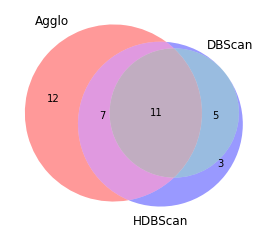

In [14]:
from matplotlib_venn import venn3
import matplotlib.pyplot as plt
fig = plt.figure()
set1 = set(agglo14)
set2 = set(dbscan9)
set3 = set(hdbscan14)

v = venn3([set1, set2, set3], ('Agglo', 'DBScan', 'HDBScan'))

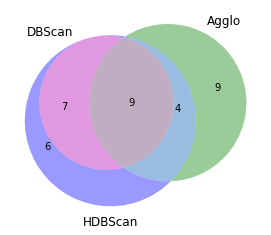

In [17]:
from matplotlib_venn import venn3
import matplotlib.pyplot as plt
fig = plt.figure()
set1 = set(dbscan9)
set2 = set(agglo12)
set3 = set(hdbscan14)

v = venn3([set1, set2, set3], ('DBScan', 'Agglo', 'HDBScan'))

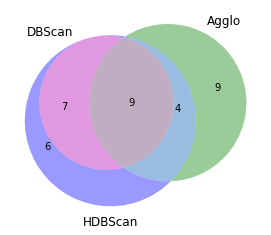

In [10]:
from matplotlib_venn import venn3
import matplotlib.pyplot as plt
fig = plt.figure()
set1 = set(dbscan9)
set2 = set(agglo11)
set3 = set(hdbscan14)

v = venn3([set1, set2, set3], ('DBScan', 'Agglo', 'HDBScan'))

In [13]:
import numpy as geek
c = geek.load('Protein-Structure-DL-master/data/pairwise2d/1a4z_4_0.npz')

In [14]:
c

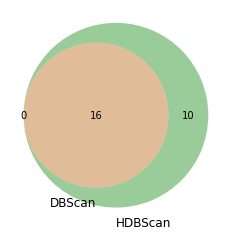

In [19]:
from matplotlib_venn import venn2
import matplotlib.pyplot as plt
fig = plt.figure()
set1 = set(dbscan9)
set2 = set(hdbscan14)

v = venn2([set1, set2], ('DBScan', 'HDBScan'))

In [46]:
for pock in agglo14:
    if pock not in hdbscan14:
        print(pock)

4asz_3
3v5w_1
6bru_1
2y4i_2
4crs_2
5li9_2
4qpm_2
4itj_1
2y4i_3
3aln_2
3v5w_2
5xs2_2
